<a href="https://colab.research.google.com/github/S1L3NTANG3L/Taxi-V3/blob/main/Taxi_v3_Visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install python-opengl -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  freeglut3 libpython2-stdlib python2 python2-minimal
Suggested packages:
  python-tk python-numpy libgle3 python2-doc
The following NEW packages will be installed:
  freeglut3 libpython2-stdlib python-opengl python2 python2-minimal
0 upgraded, 5 newly installed, 0 to remove and 23 not upgraded.
Need to get 621 kB of archives.
After this operation, 6,059 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 python2-minimal amd64 2.7.17-2ubuntu4 [27.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libpython2-stdlib amd64 2.7.17-2ubuntu4 [7,072 B]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 python2 amd64 2.7.17-2ubuntu4 [26.5 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu f

In [2]:
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 780 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 xvfb amd64 2:1.20.13-1ubuntu1~20.04.8 [780 kB]
Fetched 780 kB in 2s (442 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 130705 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.20.13-1ubuntu1~20.04.8_amd64.deb ...
Unpacking xvfb (2:1.20.13-1ubuntu1~20.04.8) ...
Setting up xvfb (2:1.20.13-1ubuntu1~20.04.8) ...
Processing triggers for man-db (2.9.1-1) ...


In [3]:
!pip install gymnasium numpy tensorflow h5py keras gymnasium[box2d] pyvirtualdisplay piglet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 KB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 KB 10.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
  Running setup.py install for box2d-py ... done
  DEPRECATION: box2d-py was installed using the legacy 'setup.py in

Settings: 


*  training_episodes - Changes amount of times agent is trained, higher is better
* display_episodes - Amount of times you want to test the agent post training
* alpha - Rate at which you want to train the agent
* gamma - No need to change the discount rate
* epsilon - Chance that the agent will make a random new move instead of maximising the reward higher value great for training



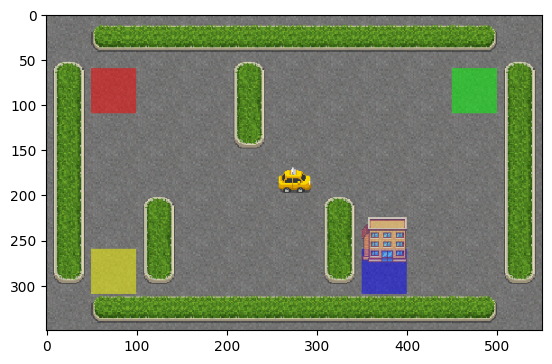

In [ ]:
import gym
import numpy
import random
from os import system, name
from time import sleep

#Display Stuff
from pyvirtualdisplay import Display
Display().start()
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

# Define function to clear console window.
def clear(): 
  
    # Clear on Windows.
    if name == 'nt': 
        _ = system('cls')
  
    # Clear on Mac and Linux. (os.name is 'posix') 
    else: 
        _ = system('clear')

clear()

"""Setup"""

env = gym.make("Taxi-v3") # Setup the Gym Environment
env.reset()
img = plt.imshow(env.render('rgb_array')) # only call this once

# Make a new matrix filled with zeros.
# The matrix will be 500x6 as there are 500 states and 6 actions.
q_table = numpy.zeros([env.observation_space.n, env.action_space.n])

training_episodes = 50000 # Amount of times to run environment while training.
display_episodes = 10 # Amount of times to run environment after training.

# Hyperparameters
alpha = 0.1 # Learning Rate
gamma = 0.6 # Discount Rate
epsilon = 0.1 # Chance of selecting a random action instead of maximising reward.

# For plotting metrics
all_epochs = []
all_penalties = []

"""Training the Agent"""

for i in range(training_episodes):
    state = env.reset() # Reset returns observation state and other info. We only need the state.
    done = False
    penalties, reward, = 0, 0
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Pick a new action for this state.
        else:
            action = numpy.argmax(q_table[state]) # Pick the action which has previously given the highest reward.

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action] # Retrieve old value from the q-table.
        next_max = numpy.max(q_table[next_state])

        # Update q-value for current state.
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10: # Checks if agent attempted to do an illegal action.
            penalties += 1

        state = next_state
        
    if i % 100 == 0: # Output number of completed episodes every 100 episodes.
        print(f"Episode: {i}")
        #env.render()

print("Training finished.\n")

"""Display and evaluate agent's performance after Q-learning."""
total_epochs, total_penalties = 0, 0

for _ in range(display_episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False   

    while not done:
        action = numpy.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1
        clear()
        
        img.set_data(env.render('rgb_array')) # just update the data
        display.display(plt.gcf())        

        #print(f"Timestep: {epochs}")
        #print(f"State: {state}")
        #print(f"Action: {action}")
        #print(f"Reward: {reward}")
        sleep(0.15) # Sleep so the user can see the 

    display.clear_output(wait=True)
    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {display_episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / display_episodes}")
print(f"Average penalties per episode: {total_penalties / display_episodes}")